In [35]:
import numpy as np
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt

In [36]:
path = r"data\1m straight pipe y branch\free pipe, no noisy.WAV"
x, sr = sf.read(path, always_2d=True)  # shape (N, 2)
L = x[:, 0]
R = x[:, 1]

In [37]:
def stats(sig):
    peak = np.max(np.abs(sig))
    rms = np.sqrt(np.mean(sig**2))
    return peak, rms

print("L:", stats(L))
print("R:", stats(R))

L: (np.float64(1.0), np.float64(0.1403633094213747))
R: (np.float64(1.0), np.float64(0.18010764658510936))


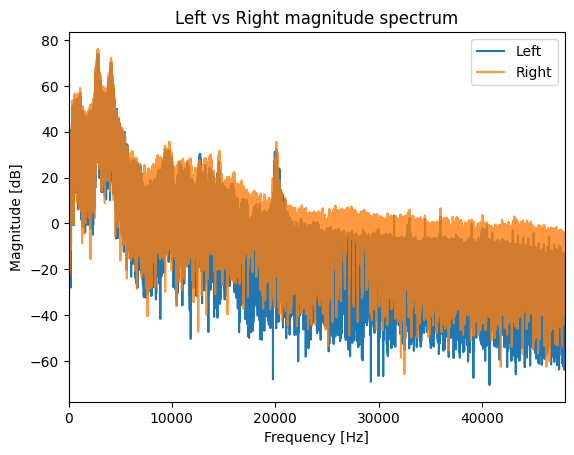

In [38]:
def mag_spectrum_db(sig, sr):
    sig = sig - np.mean(sig) # remove DC
    w = np.hanning(len(sig))
    X = np.fft.rfft(sig * w)
    f = np.fft.rfftfreq(len(sig), 1/sr)
    mag_db = 20*np.log10(np.abs(X) + 1e-12)
    return f, mag_db


fL, dBL = mag_spectrum_db(L, sr)
fR, dBR = mag_spectrum_db(R, sr)


plt.figure()
plt.plot(fL, dBL, label="Left")
plt.plot(fR, dBR, label="Right", alpha=0.8)
plt.xlim(0, sr/2)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.title("Left vs Right magnitude spectrum")
plt.legend()
plt.show()

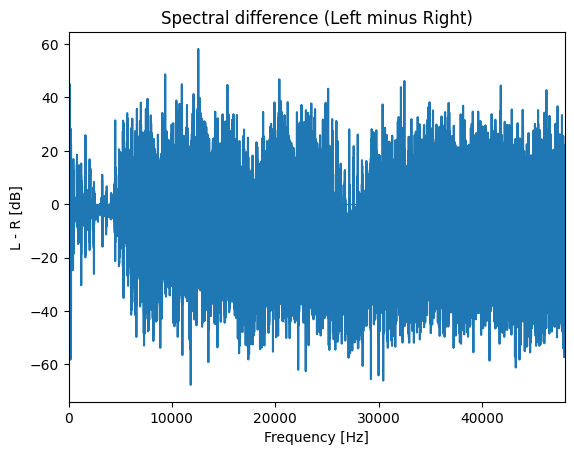

In [39]:
plt.figure()
plt.plot(fL, dBL - dBR)
plt.xlim(0, sr/2)
plt.xlabel("Frequency [Hz]")
plt.ylabel("L - R [dB]")
plt.title("Spectral difference (Left minus Right)")
plt.axhline(0, linewidth=1)
plt.show()

In [40]:
if(np.corrcoef(L, R)[0, 1] > 0.95):
    mono = 0.5 * (L + R)
    print("Using average of Left and Right channels as mono signal")
else:
    mono = L
    print("Using Left channel as mono signal")

Using average of Left and Right channels as mono signal


In [41]:
for sig, name in [(L, "Left"), (R, "Right")]:
    f, tt, Sxx = spectrogram(sig, fs=sr, nperseg=2048, noverlap=1536)

NameError: name 'spectrogram' is not defined